In [22]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
# Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for training and validation
)

train_data = data_gen.flow_from_directory(
    'dataset/training_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    'dataset/test_set',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [3]:
# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\Users\jafri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compiling the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# Callbacks for Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [7]:
# Training the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5603 - loss: 1.0477  

C:\Users\jafri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.5603 - loss: 1.0471 - val_accuracy: 0.5000 - val_loss: 0.9986 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.5979 - loss: 0.7404 - val_accuracy: 0.5375 - val_loss: 0.7915 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.6225 - loss: 0.6588 - val_accuracy: 0.6150 - val_loss: 0.6423 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 667ms/step - accuracy: 0.6534 - loss: 0.6223 - val_accuracy: 0.6650 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 148s 742ms/step - accuracy: 0.6820 - loss: 0.5928 - val_accuracy: 0.6625 - val_loss: 0.6138 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 146s 728ms/step - accuracy: 0.6835 - loss: 0.5810 - val_accuracy: 0.6900 - val_loss: 0.5941 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 146s 732ms/step - accuracy: 0.6927 - loss: 0

In [8]:
# Evaluating the Model
eval_result = model.evaluate(val_data)
print(f"Validation Loss: {eval_result[0]} - Validation Accuracy: {eval_result[1]}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8462 - loss: 0.3789
Validation Loss: 0.3386065661907196 - Validation Accuracy: 0.8650000095367432


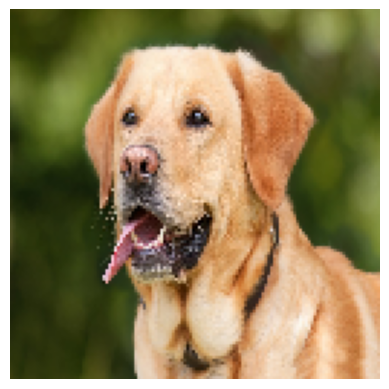

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Image: cat_or_dog_1.jpg -> Prediction: Cat


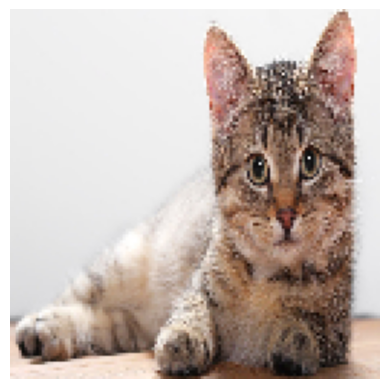

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Image: cat_or_dog_2.jpg -> Prediction: Dog


In [24]:
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return 'Dog'
    else:
        return 'Cat'

# Test predictions on images in the 'single_prediction' folder
for filename in os.listdir('dataset/single_prediction'):
    file_path = os.path.join('dataset/single_prediction', filename)
    if os.path.isfile(file_path):
        result = predict_image(file_path, model)
        print(f"Image: {filename} -> Prediction: {result}")

In [ ]:
#Medium link:https://medium.com/@jislam_64383/building-an-image-classification-model-using-convolutional-neural-networks-cnns-1769c9ced457

#Github Repo: https://github.com/Jafrin2006/CNN-for-Image-Classification-.git